# Geospatial Processing with Julia

<img src="http://photos3.meetupstatic.com/photos/event/7/c/6/2/global_374011842.jpeg" style="margin:0px auto" \>

**[yeesian](https://github.com/yeesian)@[MaptimeBoston](https://twitter.com/MaptimeBoston)**

## Overview
- Why Julia
- Geospatial processing with Julia
- Recent Development
- Opportunities and Challenges

## A Day in My Shoes
![](http://cacm.acm.org/system/assets/0001/3678/rp-overview.jpg)

http://cacm.acm.org/blogs/blog-cacm/169199-data-science-workflow-overview-and-challenges/fulltext

## Why another language?

- **programming languages as mediating devices**: strike a balance between human and computer needs
    - *Ill-specifying*: internal contradictions, or systematically flawed (unsafe, erroneous).
    - *Under-specifying*: not enough detail to analyze validity/meaning of programs.
    - *Over-specifying*: needless idiosyncrasies, so implementations are overly constrained.

http://graydon2.dreamwidth.org/1839.html

## Two Cultures of Computing
- **Batch Processing** ("expensive hardware, rarely reprogrammed")
- **Interactive Computing** (using the computer as a notebook or a whiteboard)
- **Ousterhout's Dichotomy** (one "script" and one "system" language)
    - [script] and [system]
    - R and RCpp
    - Python and Cython
    - Matlab and MEX files
    - ...

http://graydon2.dreamwidth.org/3186.html

## Beyond Ousterhout's Dichotomy

- The **"Goldilocks" perspective**:
    - reject the notion that human interactivity and batch performance are in inherent tension
    - trade some efficiency for features (interactivity, safety, reflection, debugging simplicity, etc)

- **Spoiler**: it involves, to a large extent, **Lisp**.
    - *tidy definition*: for experimentation and fast implementation.
    - easy to inspect, modify, visualize and searching the insides of running systems.
    - high quality REPLs, sophisticated mixed-mode editors, browsers, debuggers and GUIs
    
http://graydon2.dreamwidth.org/189377.html

## Why Today, and not Yesterday

![](http://venge.net/graydon/bottleneck.png)

> In a sense, 20 years after the web smashed the language landscape to pieces, we've come to a place where the criteria for a "fast language" has been nudged forwards over the line that was holding back a lot of techniques that used to be considered "too expensive to use in production" -- say, ubiquitous virtual dispatch, garbage collection, latent types -- became "acceptable costs", culturally.

http://graydon2.dreamwidth.org/189377.html

## What about current libraries: JavaScript

![](fig/jslibraries.png)

http://maptime.io/anatomy-of-a-web-map/#84

## What about current libraries: Python

![](fig/pythonlibs1.png)

## What about current libraries: Python

![](fig/pythonlibs4.png)

## Getting Started with Julia
(taken from http://quant-econ.net/jl/getting_started.html)

### Installing Julia
- The first thing you will want to do is install Julia. The best option is probably to install the current release from the [download page](http://julialang.org/downloads/)
- Assuming there were no problems, you should now be able to start Julia either by
    - **(Windows, OSX)** navigating to Julia through your menus or desktop icons, or
    - **(Linux)** opening a terminal and typing `julia`

### Installing IJulia
- The first step is to install the [Anaconda Python distribution](https://www.continuum.io/why-anaconda): [download the binary](https://www.continuum.io/downloads) and follow the instructions.
- Now open up a Julia terminal and type
```
julia> Pkg.add("IJulia")
```
    - **Warning**: The IJulia website states that if you get an error message you should remove and reinstall, or force a rebuild with `Pkg.build("IJulia")`.
    - If you have problems, consult the [installation instructions](https://github.com/JuliaLang/IJulia.jl#installation).

- To start IJulia in the browser, open up a terminal (or cmd in Windows) and type
```
jupyter notebook
```
    Here’s an example of the kind of thing you should see
    ![](http://quant-econ.net/_images/starting_nb_julia.png)
- If you click on “New” you should have the option to start a Julia notebook.

### Installing Packages
- Julia includes many useful tools in the base installation. However, you’ll quickly find that you also have need for at least some of the many [external Julia packages](http://pkg.julialang.org/).
- For the rest of the packages used in this talk, you can running the following:
    ```
    # For the common libraries used
    Pkg.add("DataFrames") # library for working with tabular data in Julia
    Pkg.add("PyPlot") # interface to http://matplotlib.org/
    Pkg.add("PlotlyJS") # interface to https://plot.ly/javascript/
    Pkg.add("Interact") # for interactive widgets such as sliders
    Pkg.add("Plots") # a plotting API and toolset.

    # For the geospatial libraries used
    Pkg.clone("https://github.com/visr/GDAL.jl.git")
    Pkg.build("GDAL") # similar in spirit to osgeo.gdal and osgeo.ogr
    Pkg.clone("https://github.com/yeesian/ArchGDAL.jl.git") # similar to fiona + rasterio
    Pkg.clone("https://github.com/yeesian/GeoDataFrames.jl.git") # DataFrames with geospatial support
    ```
    in a julia session.
- To learn more about the package manager: see http://docs.julialang.org/en/latest/manual/packages/.

## Geospatial Processing with Julia

- Follows the hands-on example at the end of https://github.com/jwass/maptime-boston-python.
- Introduce the following libraries (work-in-progress):
  - `ArchGDAL.jl` (similar to `rasterio` and `fiona`)
  - `GeoDataFrames.jl` (similar to `geopandas`)

### variables and values

In [1]:
x = 1
x, typeof(x)

(1,Int64)

In [2]:
x = 1.0
x, typeof(x)

(1.0,Float64)

In [3]:
x = "1.0"
x, typeof(x)

("1.0",ASCIIString)

In [4]:
x = true
x, typeof(x)

(true,Bool)

### data-type conversions

In [5]:
for x in (Float64(1),
          string(1.0),
          parse(Float64, "1.0"),
          parse(Int, "1"),
          Int(true))
    @show x, typeof(x)
end

(x,typeof(x)) = (1.0,Float64)
(x,typeof(x)) = ("1.0",ASCIIString)
(x,typeof(x)) = (1.0,Float64)
(x,typeof(x)) = (1,Int64)
(x,typeof(x)) = (1,Int64)


### control-flow (if-else and for-loops)

In [6]:
for word in ("julia", "at", "map", "time", "boston")
    if contains(word, "t")
        println("t: $word")
    elseif contains(word, "a")
        println("a: $word")
    else
        println("*: $word")
    end
end

a: julia
t: at
a: map
t: time
t: boston


### defining functions

In [7]:
function printword(word)
    if contains(word, "t")     println("t: $word")
    elseif contains(word, "a") println("a: $word")
    else                       println("*: $word")
    end
end

for word in ("julia", "at", "map", "time", "boston")
    printword(word)
end

a: julia
t: at
a: map
t: time
t: boston


### collections (arrays, tuples, dictionaries)

In [8]:
for x in ((1,2,3,4), 1:4, 1:2:4, collect(1:4), collect(1:2:4))
    println("$x,\t $(sizeof(x)), $(typeof(x))")
end

(1,2,3,4),	 32, Tuple{Int64,Int64,Int64,Int64}
1:4,	 16, UnitRange{Int64}
1:2:3,	 24, StepRange{Int64,Int64}
[1,2,3,4],	 32, Array{Int64,1}
[1,3],	 16, Array{Int64,1}


In [9]:
A = reshape(1:12, (3,4))

3x4 Array{Int64,2}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [10]:
@show A[:,2]
@show A[2,:]
@show A[2,2]

A' # transpose

A[:,2] = [4,5,6]
A[2,:] = [2 5 8 11]
A[2,2] = 5


4x3 Array{Int64,2}:
  1   2   3
  4   5   6
  7   8   9
 10  11  12

In [11]:
for x in (("julia", "at", "map", "time", "boston"),
          ["julia", "at", "map", "time", "boston"],
          Dict("language" => "julia",
               "event" => "maptime",
               "location" => "boston"))
    @show x
    for item in x
        println("\t $item")
    end
end

x = ("julia","at","map","time","boston")
	 julia
	 at
	 map
	 time
	 boston
x = ASCIIString["julia","at","map","time","boston"]
	 julia
	 at
	 map
	 time
	 boston
x = Dict("event"=>"maptime","location"=>"boston","language"=>"julia")
	 "event"=>"maptime"
	 "location"=>"boston"
	 "language"=>"julia"


### Other Learning Resources

For more, check out the following resources:
- [The Julia Manual](http://docs.julialang.org/en/latest/manual/)
- [Learn X in Y minutes (Julia)](https://learnxinyminutes.com/docs/julia/)
- [Learning Materials for Julia](http://julialang.org/learning/)

## Recap: Python Geospatial Libs

![](fig/pythonlibs1.png)

## Now: Julia Geospatial Libs

![](fig/juliageolibs.png)

### GDAL.jl
work in progress at https://github.com/visr/GDAL.jl

In [12]:
using GDAL
GDAL.allregister() # register the drivers

dataset = GDAL.openex("data/rodents.geojson", GDAL.GDAL_OF_VECTOR, C_NULL, C_NULL, C_NULL)

Ptr{GDAL.GDALDatasetH} @0x00007fd704d161f0

In [13]:
layer = GDAL.datasetgetlayerbyname(dataset, "OGRGeoJSON")

Ptr{GDAL.OGRLayerH} @0x00007fd704d117a0

In [14]:
feature = GDAL.getnextfeature(layer) # first feature
@show GDAL.getfieldasinteger64(feature, 0) # id
@show GDAL.getfieldasstring(feature, 1) # OPEN_DT
GDAL.destroy(feature)

GDAL.getfieldasinteger64(feature,0) = 48
GDAL.getfieldasstring(feature,1) = "11/09/2011 02:54:02 PM"


In [15]:
feature = GDAL.getnextfeature(layer) # second feature
@show GDAL.getfieldasinteger64(feature, 0)
@show GDAL.getfieldasstring(feature, 1)
GDAL.destroy(feature)

GDAL.getfieldasinteger64(feature,0) = 67
GDAL.getfieldasstring(feature,1) = "03/05/2014 08:46:53 AM"


In [16]:
GDAL.close(dataset)
GDAL.destroydrivermanager()

### ArchGDAL.jl
work-in-progress at https://github.com/yeesian/ArchGDAL.jl

In [17]:
import ArchGDAL

@time ArchGDAL.registerdrivers() do
    ArchGDAL.read("data/rodents.geojson") do dataset
        println(dataset)
    end
end

GDAL Dataset (Driver: GeoJSON/GeoJSON)
File(s): data/rodents.geojson 
Number of feature layers: 1
  Layer 0: OGRGeoJSON (wkbPoint), nfeatures = 10756

  0.520685 seconds (392.96 k allocations: 17.541 MB, 2.62% gc time)


In [18]:
@time ArchGDAL.registerdrivers() do
    ArchGDAL.read("data/rodents.geojson") do dataset
        for (i,feature) in enumerate(ArchGDAL.getlayer(dataset, 0))
            i > 2 && break
            println(feature)
        end
    end
end

Feature
  (index 0) geom => POINT
  (index 0) id => 48
  (index 1) OPEN_DT => 11/09/2011 02:54:02 PM

Feature
  (index 0) geom => POINT
  (index 0) id => 67
  (index 1) OPEN_DT => 03/05/2014 08:46:53 AM

  0.294920 seconds (97.84 k allocations: 4.423 MB)


### GeoDataFrames
experiment-in-progress at https://github.com/yeesian/GeoDataFrames.jl

In [19]:
using GeoDataFrames; const GD = GeoDataFrames

neighborhoods = GD.read("data/Boston_Neighborhoods.shp")
DataFrames.head(neighborhoods)

6×6 DataFrames.DataFrame
│ Row │ geometry0                                                              │
├─────┼────────────────────────────────────────────────────────────────────────┤
│ 1   │ Geometry: MULTIPOLYGON (((-71.1259265672231 42.2720044534673 ... 34))) │
│ 2   │ Geometry: POLYGON ((-71.104991583 42.3260930173557,-71.10487 ... 557)) │
│ 3   │ Geometry: POLYGON ((-71.0904337145803 42.3357612955289,-71.0 ... 289)) │
│ 4   │ Geometry: POLYGON ((-71.098108339852 42.3367217099475,-71.09 ... 475)) │
│ 5   │ Geometry: POLYGON ((-71.0666286565676 42.3487740128554,-71.0 ... 554)) │
│ 6   │ Geometry: POLYGON ((-71.0583778032908 42.3498224214285,-71.0 ... 285)) │

│ Row │ Acres   │ Name                    │ OBJECTID │ SHAPE_area │ SHAPE_len │
├─────┼─────────┼─────────────────────────┼──────────┼────────────┼───────────┤
│ 1   │ 1605.56 │ "Roslindale"            │ 1        │ 6.99383e7  │ 53563.9   │
│ 2   │ 2519.24 │ "Jamaica Plain"         │ 2        │ 1.09738e8  │ 56349.9   │
│ 3   │ 350.852 │ "Mission Hill"          │ 3        │ 1.52831e7  │ 17918.7   │
│ 4   │ 188.611 │ "Longwood Medical Area" │ 4        │ 8.2159e6   │ 11908.8   │
│ 5   │ 26.5397 │ "Bay Village"           │ 5        │ 1.15607e6  │ 4650.64   │
│ 6   │ 15.6398 │ "Leather District"      │ 6        │ 6.81272e5  │ 3237.14   │

In [20]:
rodents = GD.read("data/rodents.geojson")
DataFrames.head(rodents)

6×3 DataFrames.DataFrame
│ Row │ geometry0                          │ id    │ OPEN_DT                  │
├─────┼────────────────────────────────────┼───────┼──────────────────────────┤
│ 1   │ Geometry: POINT (-71.0721 42.3224) │ "48"  │ "11/09/2011 02:54:02 PM" │
│ 2   │ Geometry: POINT (-71.0617 42.3477) │ "67"  │ "03/05/2014 08:46:53 AM" │
│ 3   │ Geometry: POINT (-71.0464 42.3357) │ "86"  │ "10/19/2011 03:21:20 PM" │
│ 4   │ Geometry: POINT (-71.0168 42.3834) │ "95"  │ "05/31/2012 01:37:49 PM" │
│ 5   │ Geometry: POINT (-71.1059 42.3099) │ "96"  │ "11/20/2015 09:37:19 AM" │
│ 6   │ Geometry: POINT (-71.0765 42.342)  │ "186" │ "09/20/2012 09:11:27 AM" │

In [21]:
function numrodents(neighborhood)
    sum([ArchGDAL.contains(neighborhood.ptr, r.ptr) for r in rodents[:geometry0]])
end

@time numrodents(neighborhoods[1,:geometry0])

  1.530536 seconds (174.90 k allocations: 5.028 MB, 0.62% gc time)


156

In [22]:
@time neighborhoods[:numrodents] = Int[numrodents(n) for n in neighborhoods[:geometry0]]
DataFrames.head(neighborhoods)

 42.293394 seconds (2.75 M allocations: 55.753 MB, 0.03% gc time)


6×7 DataFrames.DataFrame
│ Row │ geometry0                                                              │
├─────┼────────────────────────────────────────────────────────────────────────┤
│ 1   │ Geometry: MULTIPOLYGON (((-71.1259265672231 42.2720044534673 ... 34))) │
│ 2   │ Geometry: POLYGON ((-71.104991583 42.3260930173557,-71.10487 ... 557)) │
│ 3   │ Geometry: POLYGON ((-71.0904337145803 42.3357612955289,-71.0 ... 289)) │
│ 4   │ Geometry: POLYGON ((-71.098108339852 42.3367217099475,-71.09 ... 475)) │
│ 5   │ Geometry: POLYGON ((-71.0666286565676 42.3487740128554,-71.0 ... 554)) │
│ 6   │ Geometry: POLYGON ((-71.0583778032908 42.3498224214285,-71.0 ... 285)) │

│ Row │ Acres   │ Name                    │ OBJECTID │ SHAPE_area │ SHAPE_len │
├─────┼─────────┼─────────────────────────┼──────────┼────────────┼───────────┤
│ 1   │ 1605.56 │ "Roslindale"            │ 1        │ 6.99383e7  │ 53563.9   │
│ 2   │ 2519.24 │ "Jamaica Plain"         │ 2        │ 1.09738e8  │ 56349.9   │
│ 3   │ 350.852 │ "Mission Hill"          │ 3        │ 1.52831e7  │ 17918.7   │
│ 4   │ 188.611 │ "Longwood Medical Area" │ 4        │ 8.2159e6   │ 11908.8   │
│ 5   │ 26.5397 │ "Bay Village"           │ 5        │ 1.15607e6  │ 4650.64   │
│ 6   │ 15.6398 │ "Leather District"      │ 6        │ 6.81272e5  │ 3237.14   │

│ Row │ numrodents │
├─────┼────────────┤
│ 1   │ 156        │
│ 2   │ 491        │
│ 3   │ 157        │
│ 4   │ 4          │
│ 5   │ 81         │
│ 6   │ 10         │

### our first plot

[Plots.jl] Initializing backend: pyplot
 22.263985 seconds (18.15 M allocations: 793.389 MB, 1.63% gc time)



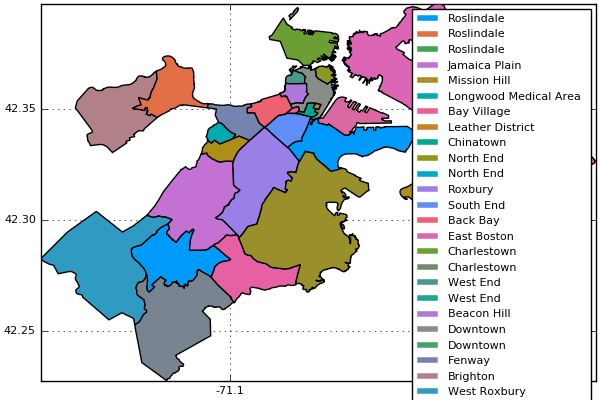

In [23]:
@time GeoDataFrames.plot(neighborhoods,
    label=:Name,
    plt = Plots.plot(bg = :white))

### switching to a different backend
for reference: https://juliaplots.github.io/backends/

In [24]:
using Plots
plotlyjs()

Plots.PlotlyJSBackend()

In [25]:
@time GeoDataFrames.plot(neighborhoods,
    label=:Name,
    plt = Plots.plot(bg = :white))

[Plots.jl] Initializing backend: plotlyjs
  6.675909 seconds (6.51 M allocations: 285.039 MB, 1.54% gc time)


### making a chloropleth

In [26]:
@time GeoDataFrames.plot(neighborhoods,
    label = :Name,
    plt = Plots.plot(bg = :white),
    fillvalue = :numrodents,
    legend = false)

  0.312263 seconds (1.11 M allocations: 55.259 MB, 4.18% gc time)


### choosing a color palette

In [27]:
@time GeoDataFrames.plot(neighborhoods,
    label = :Name,
    plt = Plots.plot(bg = :white),
    fillvalue = :numrodents,
    legend = false,
    colorgrad = Plots.cgrad(:blues))

  0.177945 seconds (1.04 M allocations: 52.231 MB, 6.05% gc time)


**For more options**: check out the documentation at https://juliaplots.github.io/.

### other tools for interactivity

Interact.Options{:ToggleButtons,Symbol}(Signal{Symbol}(inferno, nactions=0),"cg",:inferno,"inferno",Interact.OptionDict(Any["inferno","heat","blues"],Dict{Any,Any}("heat"=>:heat,"blues"=>:blues,"inferno"=>:inferno)),Any[],Any[])

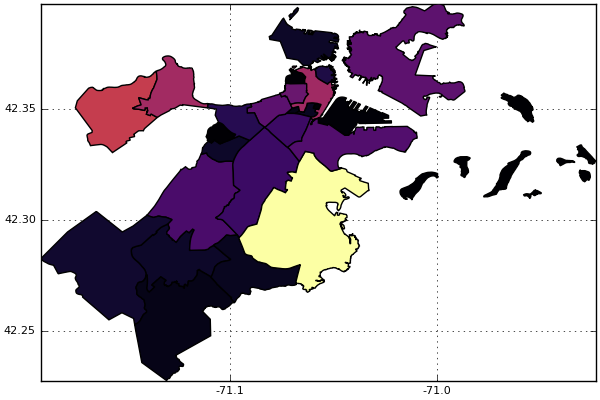

In [28]:
using Interact
pyplot()

@manipulate for cg in [:inferno, :heat, :blues]
    GeoDataFrames.plot(neighborhoods,
        label = :Name,
        plt = Plots.plot(bg = :white),
        fillvalue = :numrodents,
        legend = false,
        colorgrad = Plots.cgrad(cg))
end

**If you were to make a change, what might it be?**

![](https://imgs.xkcd.com/comics/convincing.png)

**Source**: https://xkcd.com/833/

**If you were to make a change, what might it be?**

![](https://pbs.twimg.com/media/CCkxFH2UgAAI4uL.jpg)

**Source**: https://twitter.com/MapOfTheWeek/status/588055199719251970

**If you were to make a change, what might it be?**

![](https://imgs.xkcd.com/comics/heatmap.png)
**Source**: http://xkcd.com/1138/ (and [discussion](http://andywoodruff.com/blog/its-just-a-population-map/))

**If you were to make a change, what might it be?**

![](http://maptimeboston.github.io/web-maps-101/images/cart-cube.png)

**Source**: http://maptimeboston.github.io/web-maps-101/#52

## Recap: Julia Geospatial Libs

![](fig/juliageo_blurb.png)

## Coming Up: Julia Geospatial Libs

![](fig/sqltables.png)

## Coming Up: Julia Geospatial Libs

![](fig/sqlquery.png)

## Coming Up: A grammar of data manipulation
work-in-progress at https://github.com/davidagold/jplyr.jl and https://github.com/yeesian/SQLQuery.jl/tree/parse-expr

In [29]:
using SQLQuery

@sqlquery tbl |> select(a,b)

SELECT a,
       b
  FROM tbl

In [30]:
@sqlquery tbl |> filter(a > 100, b == "maptime")

SELECT *
  FROM tbl
 WHERE a > 100
   AND b == 'maptime'

In [31]:
@sqlquery tbl |> orderby(desc(a))

  SELECT *
    FROM tbl
ORDER BY a DESC

you compose "verbs" using "pipes" `|>`

In [32]:
@sqlquery tbl |>
    select(*, result = sqrt(column1, col2), a = min(2,column3)) |> 
    filter(result > 1000) |>
    orderby(desc(a))

  SELECT *
    FROM (SELECT *
            FROM (SELECT *,
                         sqrt(column1,col2) AS result,
                         min(2,column3) AS a
                    FROM tbl)
           WHERE result > 1000)
ORDER BY a DESC

**For more**: see https://cran.r-project.org/web/packages/dplyr/vignettes/introduction.html for inspiration.

### Behind the Scenes

In [33]:
expression = :(tbl |>
    select(*, result = sqrt(column1, col2), a = min(2,column3)) |> 
    filter(result > 1000) |>
    orderby(desc(a)))

:(((tbl |> select(*,result=sqrt(column1,col2),a=min(2,column3))) |> filter(result > 1000)) |> orderby(desc(a)))

In [34]:
dump(SQLQuery._sqlquery(expression))

SQLQuery.OrderbyNode{SQLQuery.FilterNode{SQLQuery.SelectNode{Symbol}}} 
  input: SQLQuery.FilterNode{SQLQuery.SelectNode{Symbol}} 
    input: SQLQuery.SelectNode{Symbol} 
      input: Symbol tbl
      args: Array(Any,(3,))
        1: Symbol *
        2: Expr 
          head: Symbol kw
          args: Array(Any,(2,))
          typ: Any
        3: Expr 
          head: Symbol kw
          args: Array(Any,(2,))
          typ: Any
    args: Array(Expr,(1,)) [:(result > 1000)]
  args: Array(Any,(1,))
    1: Expr 
      head: Symbol call
      args: Array(Any,(2,))
        1: Symbol desc
        2: Symbol a
      typ: Any


In [35]:
SQLQuery.translatesql(SQLQuery._sqlquery(expression))

"  SELECT *\n    FROM (SELECT *\n            FROM (SELECT *,\n                         sqrt(column1,col2) AS result,\n                         min(2,column3) AS a\n                    FROM tbl)\n           WHERE result > 1000)\nORDER BY a DESC"

### Applying it to Practice

In [36]:
macro inspect(args...)
    ArchGDAL.registerdrivers() do
        ArchGDAL.read("data/test-2.3.sqlite") do dataset
            sqlcommand = SQLQuery.translatesql(SQLQuery._sqlquery(args))
            ArchGDAL.executesql(dataset, sqlcommand) do results
                GeoDataFrames.geodataframe(results)
            end
        end
    end
end

@inspect towns |>
    select(*) |>
    limit(5)

5×7 DataFrames.DataFrame
│ Row │ geometry0                              │ PK_UID │ Name                 │
├─────┼────────────────────────────────────────┼────────┼──────────────────────┤
│ 1   │ Geometry: POINT (427002.77 4996361.33) │ 1      │ "Brozolo"            │
│ 2   │ Geometry: POINT (367470.48 4962414.5)  │ 2      │ "Campiglione-Fenile" │
│ 3   │ Geometry: POINT (390084.12 5025551.73) │ 3      │ "Canischio"          │
│ 4   │ Geometry: POINT (425246.99 5000248.3)  │ 4      │ "Cavagnolo"          │
│ 5   │ Geometry: POINT (426418.89 4957737.37) │ 5      │ "Magliano Alfieri"   │

│ Row │ Peoples │ LocalCounc │ County │ Region │
├─────┼─────────┼────────────┼────────┼────────┤
│ 1   │ 435     │ 1          │ 0      │ 0      │
│ 2   │ 1284    │ 1          │ 0      │ 0      │
│ 3   │ 274     │ 1          │ 0      │ 0      │
│ 4   │ 2281    │ 1          │ 0      │ 0      │
│ 5   │ 1674    │ 1          │ 0      │ 0      │

In [37]:
@sqlquery towns |>
    select(name, peoples) |>
    filter(peoples > 350000) |>
    orderby(desc(peoples))

  SELECT *
    FROM (SELECT *
            FROM (SELECT name,
                         peoples
                    FROM towns)
           WHERE peoples > 350000)
ORDER BY peoples DESC

In [38]:
@inspect towns |>
    select(name, peoples) |>
    filter(peoples > 350000) |>
    orderby(desc(peoples))

8×2 DataFrames.DataFrame
│ Row │ name      │ peoples │
├─────┼───────────┼─────────┤
│ 1   │ "Roma"    │ 2546804 │
│ 2   │ "Milano"  │ 1256211 │
│ 3   │ "Napoli"  │ 1004500 │
│ 4   │ "Torino"  │ 865263  │
│ 5   │ "Palermo" │ 686722  │
│ 6   │ "Genova"  │ 610307  │
│ 7   │ "Bologna" │ 371217  │
│ 8   │ "Firenze" │ 356118  │

In [39]:
@sqlquery towns |>
    select(ntowns = count(*),
           smaller = min(peoples),
           bigger = max(peoples),
           totalpeoples = sum(peoples),
           meanpeoples = sum(peoples) / count(*))

SELECT count(*) AS ntowns,
       min(peoples) AS smaller,
       max(peoples) AS bigger,
       sum(peoples) AS totalpeoples,
       sum(peoples) / count(*) AS meanpeoples
  FROM towns

In [40]:
@inspect towns |>
    select(ntowns = count(*),
           smaller = min(peoples),
           bigger = max(peoples),
           totalpeoples = sum(peoples),
           meanpeoples = sum(peoples) / count(*))

1×5 DataFrames.DataFrame
│ Row │ ntowns │ smaller │ bigger  │ totalpeoples │ meanpeoples │
├─────┼────────┼─────────┼─────────┼──────────────┼─────────────┤
│ 1   │ 8101   │ 33      │ 2546804 │ 57006147     │ 7036        │

In [41]:
@inspect highways |>
    select(PK_UID,
           npts = npoint(geometry),
           astext(startpoint(geometry)),
           astext(endpoint(geometry)),
           x(nthpoint(geometry,2)),
           y(nthpoint(geometry,2))) |>
    orderby(desc(npts))

775×6 DataFrames.DataFrame
│ Row │ PK_UID │ npts │ ST_AsText(ST_StartPoint(geometry))     │
├─────┼────────┼──────┼────────────────────────────────────────┤
│ 1   │ 774    │ 6758 │ "POINT(632090.156998 4835616.546126)"  │
│ 2   │ 775    │ 5120 │ "POINT(663292.190654 4795627.307765)"  │
│ 3   │ 153    │ 4325 │ "POINT(668247.593086 4862272.349444)"  │
│ 4   │ 205    │ 3109 │ "POINT(671613.424233 4854121.472532)"  │
│ 5   │ 773    │ 2755 │ "POINT(619601.675367 4855174.599496)"  │
│ 6   │ 767    │ 2584 │ "POINT(669230.644526 4861399.656095)"  │
│ 7   │ 207    │ 2568 │ "POINT(654262.489833 4855356.779528)"  │
│ 8   │ 151    │ 2333 │ "POINT(678698.183542 4835739.644472)"  │
│ 9   │ 149    │ 2206 │ "POINT(671618.220589 4854185.937448)"  │
│ 10  │ 769    │ 2200 │ "POINT(657836.87225 4842388.82151)"    │
│ 11  │ 364    │ 2057 │ "POINT(664216.052197 4910551.772908)"  │
⋮
│ 764 │ 593    │ 2    │ "POINT(1279460.302603 4455486.416492)" │
│ 765 │ 629    │ 2    │ "POINT(834676.189175 4176911.866083)"  │
│ 766 │ 644    │ 2    │ "POINT(635053.256123 4834800.492181)"  │
│ 767 │ 646    │ 2    │ "POINT(650945.744032 4839317.605142)"  │
│ 768 │ 658    │ 2    │ "POINT(627191.750907 4780827.334327)"  │
│ 769 │ 660    │ 2    │ "POINT(674655.614499 4700125.588211)"  │
│ 770 │ 662    │ 2    │ "POINT(673807.281322 4680051.047545)"  │
│ 771 │ 667    │ 2    │ "POINT(644963.657855 4756958.708368)"  │
│ 772 │ 739    │ 2    │ "POINT(648776.651669 4839450.169705)"  │
│ 773 │ 746    │ 2    │ "POINT(642537.126181 4909859.34038)"   │
│ 774 │ 756    │ 2    │ "POINT(652015.588324 4795267.514219)"  │
│ 775 │ 758    │ 2    │ "POINT(663171.02616 4826132.0299)"     │

│ Row │ ST_AsText(ST_EndPoint(geometry))       │ ST_X(ST_PointN(geometry,2)) │
├─────┼────────────────────────────────────────┼─────────────────────────────┤
│ 1   │ "POINT(663300.737479 4795631.803342)"  │ 632086.0                    │
│ 2   │ "POINT(632085.166691 4835620.171885)"  │ 663296.0                    │
│ 3   │ "POINT(671618.13304 4854179.734158)"   │ 6.68233e5                   │
│ 4   │ "POINT(654264.259259 4855357.41189)"   │ 6.71611e5                   │
│ 5   │ "POINT(668724.797158 4862015.941886)"  │ 6.19594e5                   │
│ 6   │ "POINT(656778.219794 4841754.820045)"  │ 6.69235e5                   │
│ 7   │ "POINT(671604.674669 4854161.831221)"  │ 6.54264e5                   │
│ 8   │ "POINT(671608.752851 4854176.222572)"  │ 6.78649e5                   │
│ 9   │ "POINT(678650.789552 4835773.241197)"  │ 6.7163e5                    │
│ 10  │ "POINT(668753.698596 4861983.767314)"  │ 6.57847e5                   │
│ 11  │ "POINT(667841.057054 4863143.709969)"  │ 6.64159e5                   │
⋮
│ 764 │ "POINT(1279462.141229 4455486.605585)" │ 1.27946e6                   │
│ 765 │ "POINT(834688.089364 4176945.750929)"  │ 8.34688e5                   │
│ 766 │ "POINT(635119.298256 4834787.520683)"  │ 6.35119e5                   │
│ 767 │ "POINT(650982.16663 4839313.659256)"   │ 6.50982e5                   │
│ 768 │ "POINT(627191.83998 4780822.56832)"    │ 6.27192e5                   │
│ 769 │ "POINT(674647.206456 4700108.688147)"  │ 6.74647e5                   │
│ 770 │ "POINT(673807.340264 4680048.664936)"  │ 6.73807e5                   │
│ 771 │ "POINT(644956.706538 4756956.177414)"  │ 6.44957e5                   │
│ 772 │ "POINT(648823.447118 4839446.443134)"  │ 6.48823e5                   │
│ 773 │ "POINT(642538.837072 4909859.377695)"  │ 6.42539e5                   │
│ 774 │ "POINT(652009.671306 4795298.376483)"  │ 6.5201e5                    │
│ 775 │ "POINT(663120.196441 4826154.639667)"  │ 6.6312e5                    │

│ Row │ ST_Y(ST_PointN(geometry,2)) │
├─────┼─────────────────────────────┤
│ 1   │ 4.83563e6                   │
│ 2   │ 4.79563e6                   │
│ 3   │ 4.86227e6                   │
│ 4   │ 4.85413e6                   │
│ 5   │ 4.85517e6                   │
│ 6   │ 4.86139e6                   │
│ 7   │ 4.85537e6                   │
│ 8   │ 4.83578e6        

In [42]:
@sqlquery highways |>
    select(PK_UID,
           npts = npoint(geometry),
           astext(startpoint(geometry)),
           astext(endpoint(geometry)),
           x(nthpoint(geometry,2)),
           y(nthpoint(geometry,2))) |>
    orderby(desc(npts))

  SELECT *
    FROM (SELECT PK_UID,
                 ST_NumPoints(geometry) AS npts,
                 ST_AsText(ST_StartPoint(geometry)),
                 ST_AsText(ST_EndPoint(geometry)),
                 ST_X(ST_PointN(geometry,2)),
                 ST_Y(ST_PointN(geometry,2))
            FROM highways)
ORDER BY npts DESC

## Opportunities and Challenges
![](http://cacm.acm.org/system/assets/0001/3678/rp-overview.jpg)

http://cacm.acm.org/blogs/blog-cacm/169199-data-science-workflow-overview-and-challenges/fulltext

## Opportunities and Challenges

- Wes McKinney, [Data Tools and the Data Scientist Shortage](http://www.slideshare.net/wesm/data-tools-and-the-data-scientist-shortage)

![](fig/hierarchyneeds.png)

## Opportunities and Challenges

- Wes McKinney, [Data Tools and the Data Scientist Shortage](http://www.slideshare.net/wesm/data-tools-and-the-data-scientist-shortage)

![](fig/datatools2.png)

## Opportunities and Challenges

- Wes McKinney, [Data Tools and the Data Scientist Shortage](http://www.slideshare.net/wesm/data-tools-and-the-data-scientist-shortage)

![](fig/datatools.png)

## Opportunities and Challenges

> Learn tools, and use tools, but don't accept tools. Always distrust them; always be alert for alternative ways of thinking. This is what I mean by avoiding the conviction that you "know what you're doing". -- **Bret Victor**, [*The Future of Programming*](http://worrydream.com/dbx/)

- Encourage common/shared resources across multiple languages (Matlab, R, Python, Julia, etc):

    - [SQLite & Spatialite](https://lists.osgeo.org/pipermail/gdal-dev/2012-August/033814.html) and [VirtualOGR](https://lists.osgeo.org/pipermail/gdal-dev/2012-August/033832.html)
    - [GDAL2.0+](https://trac.osgeo.org/gdal/wiki/Release/2.0.0-News)
    - [JupyterLab](http://blog.jupyter.org/2016/07/14/jupyter-lab-alpha/)
    
    - ...

## Opportunities and Challenges

- Roger Bivand, [The R Development Process](https://r2014-mtp.sciencesconf.org/file/92674)
    - The very specific and uncodified skill set in R development and maintenance, covering not only a mix of programming languages, but also attitudes to checking the consequences of commits
    - Recruitment is problematic; doing R, CRAN or R-Forge maintenance does not bring tenure, and very often insufficient understanding for the dilemmas faced by maintainers is shown
    - R will benefit from the maturing of alternatives such as Julia [and Python], and movements between projects among developers should be seen as a useful sharing of experience

## Some Ideas for New Packages

1. **LeafletJS.jl** -- Julia interface to [leaflet.js](http://leafletjs.com/) visualization library
2. **MapboxJS.jl** -- Julia interface to [mapbox.js](https://www.mapbox.com/mapbox.js) visualization library
3. **MapStyle.jl** -- specification for styling plots (e.g. [CartoCSS](https://github.com/mapbox/carto/), or [Mapbox GL Style](https://www.mapbox.com/mapbox-gl-style-spec/))
4. **MapTiles.jl**  -- fetch map tiles from different services
5. **GDALBenchmarks.jl** -- provide benchmark datasets to measure performance of GDAL/wrappers
6. Better Raster Processing Tools